# Kapitel 4

## 4.3 Perceptron-Lernen

**Aufgabe**   
Wie sieht die Gleichtung für die Gewichtswerte $\vec{w}^t=(-0.9,0.1,0.1)$ 

**Lösung**   
$s=(-0.9\cdot1.0,0.1\cdot0.0,0.1\cdot0.0)=0.9$

-----

**Aufgabe**   
Wie sieht der Wert für $\vec{x}=(1.0,0.0,0.0) aus?   

**Lösung**   
$s=(1.0\cdot1.0,0.1\cdot0.0,0.1\cdot0.0)=1.0$


## 4.5 Perceptron-Lernalgorithmus

In [ ]:
# Plot 
import matplotlib.pyplot as plt
# Zufallzahlen-Generator
from random import choice
# Für die mathematischen Operationen
from numpy import array, dot, zeros, random#Ganz wichtig, sonst wird der Plot nicht angezeigt
%matplotlib inline

#Die veavisde-Stufenfunktion als Lamba-Funktion
heaviside = lambda x: 0 if x < 0 else 1

#Training
def fit(iterations, training_data_set, w):
    """
    Lernen im Perceptron
    
    iterations: Ein Vorwärts- und Rückwärtsöauf aller Trainingsbeispiele
    trainings_data_set: Die Traningsbeispiel
    w: Die Gewichte zum Starten
    
    """
    errors = []
    weights = []
    for i in range(iterations):
            # zufällige Auswahl eines Traningsbeispiels randomchoice
            training_data = choice(training_data_set)
            x = training_data[0]
            y = training_data[1]
            # Den errecheten Output ermitteln: Gewichtete Summe
            # nachgelagerter Stufenfunktion
            y_hat = heaviside(dot(w,x))
            # Fhler berechnen als Differenzierun zwischen gewünschten und
            # aktuellen Output
            error = y - y_hat
            # Fehler sammeln für die Ausgabe
            errors.append(error)
            # Gewichte sammlen für spätere Ausgabe
            weights.append(w)
            # Gewichtsanpassung = Das Lernen... x_i ist entweder 0 oder 1
            w += error * x
            #Rückgabe der Fehler und Gewichte
    return errors, weights

def main():
    """ Hauptprogramm
    hier werde die einzelnen Bausteine zusammengesetzt
    """
    # Trainingsdaten
    # Pro Zeile: die binären Inputdaten und die gewünschte binäre Ausgabe
    # in einer liste von Tupeln
    # An der Indexposition 0 des Inputvektors ist das Bias-Neuron
    training_data_set = [
        (array([1,0,0]), 0),
        (array([1,0,1]), 1),
        (array([1,1,0]), 1),
        (array([1,1,1]), 1)
    ]
    
    # Anfgangsinitialisierung des Zufallgenereators wegen
    # Reprodutierbarkeit der Ergebnisse
    random.seed(12) # irgendein Wert
    #Array von Länge 3 mit 0 initialisieren
    w = zeros(3)
    # Die Anzahl der Durchläufe, Erfahrungswert durch Probieren
    iterations = 30
    
    # Trainieren nut fit()
    # Wir sammrln die Fehler/Gewichte in jedem Schritt für die grafische Ausgabe
    errors, weights = fit(iterations, training_data_set, w)
    # Den letzten Gewichtsverktor ausgeben
    w = weights[iterations -1]
    print("Gewichtsverktor am Ende des Trainings:")
    print(w)
    
    # Auswertung nach dem Trainineren
    print("Auswertung am Ende des Trainings:")
    for x, y in training_data_set:
        y_hat = heaviside(dot(x, w))
        print ("{}: {} -> {}]".format(x, y, y_hat))
        
    # Grafik für Fehler pro Lernbeispiel :-)
    # Figure Nummern Start
    fignr = 1
    # Durkcgröße in inch
    plt.figure(fignr, figsize=(10,10))
    # Ausgabe Fehler als Plot
    plt.plot(errors)
    #Raster
    plt.style.use("seaborn-v0_8-whitegrid")
    # Labels
    plt.xlabel('Iteration')
    # Label der y-Achse mithilfe von LaTeX
    plt.ylabel(r"$(y - \hat y)$")
    # Plot anzeigen
    plt.show()
    
# Hauptprogramm
main()
    

# 4.6 Aufgabe: Korrektur der Gewichte (S 83)
Alle

# 4.7 scikit-learn-kompatibler Estimator (S 117)

[1 0 0]: 0 -> 1
[1 0 1]: 1 -> 1
[1 1 0]: 1 -> 1
[1 1 1]: 1 -> 1


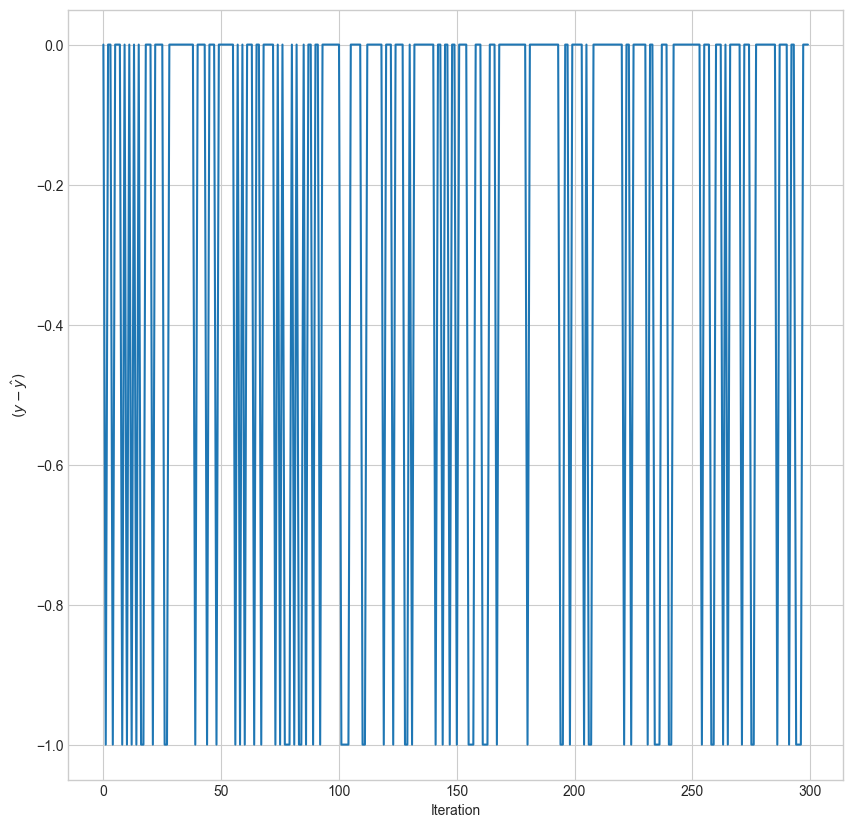

In [10]:
# Numpy hilft uns mit den arrays
import numpy as np
# Grafische Darstellung
import matplotlib.pyplot as plt
# Das sind unsere Basisklassen
from sklearn.base import BaseEstimator, ClassifierMixin
# Prüfroutinen für die Konsistenz der Daten etc.
from sklearn.utils.validation import check_X_y, check_is_fitted, check_random_state
# Puffern der unterschiedlichen Zielwerte
from sklearn.utils.multiclass import unique_labels
# GAnz wichtig, sond wird der Plot nicht angezeigt
%matplotlib inline

# Unser Estimator, passend bezeichnet und die Basisklassen
class PerceptronEstimator(BaseEstimator, ClassifierMixin):
    #Initialisierung
    def __init__(self, n_iterations=20, random_state=None):
        """ Initialisierung der Object
        n_Iterations: Anzahl der Iterationen für das Lernen
        random_state_seed: Um Wiederholbarkeit zu garantieren, sollte ein
                            numpy.random.RandomState Objekt konstruiert werden,
                            das mit random_state_seed..Seed initialisiert wurde.
        """
        # Die Anzahl der Iterationen
        self.n_iterations = n_iterations
        # Die Seed für den Zufallsgenerator
        self.random_state = random_state
        # Die Fehler im Lernprocess für den Plot gepuffert
        self.errors = []

    # Eine Stufenfunktion, benannt nach dem Mathematiker und Physiker
    # Oliver Heaviside
    def heaviside(self, x):
        """ Eine Stufenfunktion
        
        x: Der Wert, für den die Stufenfunktion ausgewertet wird
        """
        if x < 0:
            result = 0
        else:
            result = 1
        return result

    # Lernen
    def fit(self, X=None, y=None):
        """ Trainieren

        X: Array.ähnliche Struktuer mit [N,D], wobei
            N: Zeilen = Anzahl der Lernbeispiele und
            D: Spalten = Anzahl der Features
        y: Array
        """
        # Erzeugung des Zufallsgenerators (RNG)
        random_state = check_random_state(self.random_state)
        # Gewichtsinitialisierung
        # np.size(.,1) = Anzahl der Spalten
        self.w = random_state.random_sample(np.size(X, 1))
        # Prüfe, ob X und y die korrekte shape haben: X.shape[0] = y.shape[0]
        X, y = check_X_y(X, y)
        # Lerndaten für spätere Prüfung in Methode predict speicjhern
        self.X_ = X
        self.y_ = y
        # Lernen
        for i in range(self.n_iterations):
            # zufälliges Durchwürfelnm, für batch size = 1
            # np.size(.,0) = Anzahl der Zeilen
            rand_index = random_state.randint(0, np.size(X,0))
            # Ein zufälliger Inputvektor
            x_ = X[rand_index]
            # Ein dazu passender Output
            y_ = y[rand_index]
            # Den errechneten Output ermitteln:
            # Gewichtete Summe mit nachgelagerter Stufenfunktion
            y_hat = self.heaviside(np.dot(self.w, x_))
            # Fehler berechnen als Differenz zwischen gewünschtem und
            # aktuellem Output
            error = y_ - y_hat
            # Fehler sammeln für die Ausgabe
            self.errors.append(error)
            # Gewichtsanpassung = Das Lernen
            self.w += error * y_
            # Rückgane des Estimators für verküpfte Aufruf
        return self
    
    # Auswerten
    def predict(self, x):
        """ Auswerten eines Verktors
        
        x: Ein Test-Inputvektor       
        """
        # Prüfen, ob fit bereits aufgerufen wurde
        # Die Daten wurden in der Methode fit gesetzt
        check_is_fitted(self, ['X_', 'y_'])
        # Auswerten, Forward Path
        y_hat = self.heaviside(np.dot(self.w,x))

        return y_hat
    
    # Plot
    def plot(self):
        """ Ausgabe des Fehlers
        
        Die im Fehlerarray gespeicherten Fehler als Grafik ausgeben
        """
        # Figure-Nummern Start
        fignr = 1
        # Druckgröße in inch
        plt.figure(fignr, figsize=(10,10))
        # Ausgabe Fehler als Plot
        plt.plot(self.errors)
        # Raster
        plt.style.use("seaborn-v0_8-whitegrid")
        # Labels
        plt.xlabel('Iteration')
        plt.ylabel(r"$(y -\hat y)$")

def main():
    # Trainings daten
    X = np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
    y = np.array([0,1,1,1])
    # Lernen
    Perceptron = PerceptronEstimator(30,10)
    Perceptron.fit(X,y)
    # Testdaten
    x = np.array([1,0,0])
    # Auswertung 
    for index, x in enumerate(X):
        p = Perceptron.predict(x)
        print("{}: {} -> {}".format(x, y[index], p))
    # Graph ausgeben
    Perceptron.plot()

# Hauptprogramm
main()
            

